In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
from itertools import combinations
from networkx import write_gpickle as write_g
import networkx as nx
import operator

In [75]:
plays_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Shakespeare Network Analyses/Shakespeare_data.csv")
# Drop stage directions (where there isn't an act/scene/line)
plays_df = plays_df[pd.notna(plays_df['ActSceneLine'])]
plays_df[['Act','Scene','Line']] = plays_df['ActSceneLine'].str.split('.',expand = True).astype(float)
plays_df = plays_df.drop('ActSceneLine',axis=1)
# Drop Shakespeare's histories
tragedies = ["Romeo and Juliet"]
plays_df = plays_df[plays_df["Play"].isin(tragedies)]
print("{} rows and {} columns".format(*plays_df.shape))
plays_df.head()

3096 rows and 8 columns


,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
85283,85284,Romeo and Juliet,7.0,RICHMOND,"Two households, both alike in dignity,",1.0,0.0,1.0
85284,85285,Romeo and Juliet,7.0,RICHMOND,"In fair Verona, where we lay our scene,",1.0,0.0,2.0
85285,85286,Romeo and Juliet,7.0,RICHMOND,"From ancient grudge break to new mutiny,",1.0,0.0,3.0
85286,85287,Romeo and Juliet,7.0,RICHMOND,Where civil blood makes civil hands unclean.,1.0,0.0,4.0
85287,85288,Romeo and Juliet,7.0,RICHMOND,From forth the fatal loins of these two foes,1.0,0.0,5.0


In [76]:
#plays_df.replace({'LEAR': 'KING LEAR'},inplace=True)

In [77]:
play_name = "Romeo and Juliet"
single_play = plays_df[(plays_df['Play'] == play_name)]
# Group the df by character to get how often each speak
characters = single_play.groupby(['Player']).size().reset_index()
characters.rename(columns = {0: 'Count'}, inplace = True)
# Get top 20 characters
characters = characters[characters["Count"] > 5]

In [78]:
characters = characters["Player"]

In [79]:
characters

1         Apothecary
2          BALTHASAR
3           BENVOLIO
4            CAPULET
5             Chorus
6         FRIAR JOHN
7     FRIAR LAURENCE
8      First Citizen
9     First Musician
10     First Servant
11    First Watchman
12           GREGORY
13            JULIET
15      LADY CAPULET
17          MERCUTIO
18          MONTAGUE
20             NURSE
21             Nurse
22              PAGE
23             PARIS
24             PETER
25            PRINCE
26          RICHMOND
27             ROMEO
28           SAMPSON
31    Second Servant
33           Servant
34            TYBALT
Name: Player, dtype: object

In [80]:
def graphify(characters):
  play_graph = nx.Graph()
  play_graph.add_nodes_from(characters)
  scenes_df = single_play.groupby(['Act','Scene','Player']).size()
  scenes_df = scenes_df.loc[:,:,characters]
  for (act,scene), counts in scenes_df.groupby(['Act','Scene']):
    chars = counts.index.get_level_values(2).tolist()
    pairs = list(combinations(chars,2))
    for (a_char, b_char) in pairs:
        if play_graph.has_edge(a_char, b_char):
            play_graph[a_char][b_char]['weight'] += 1
        else:
            play_graph.add_edge(a_char, b_char,weight=1)
  return play_graph

In [92]:
wChars = graphify(characters.drop(labels=[5,26]))
woChars = graphify(characters.drop(labels=[5,26,15,13,27]))

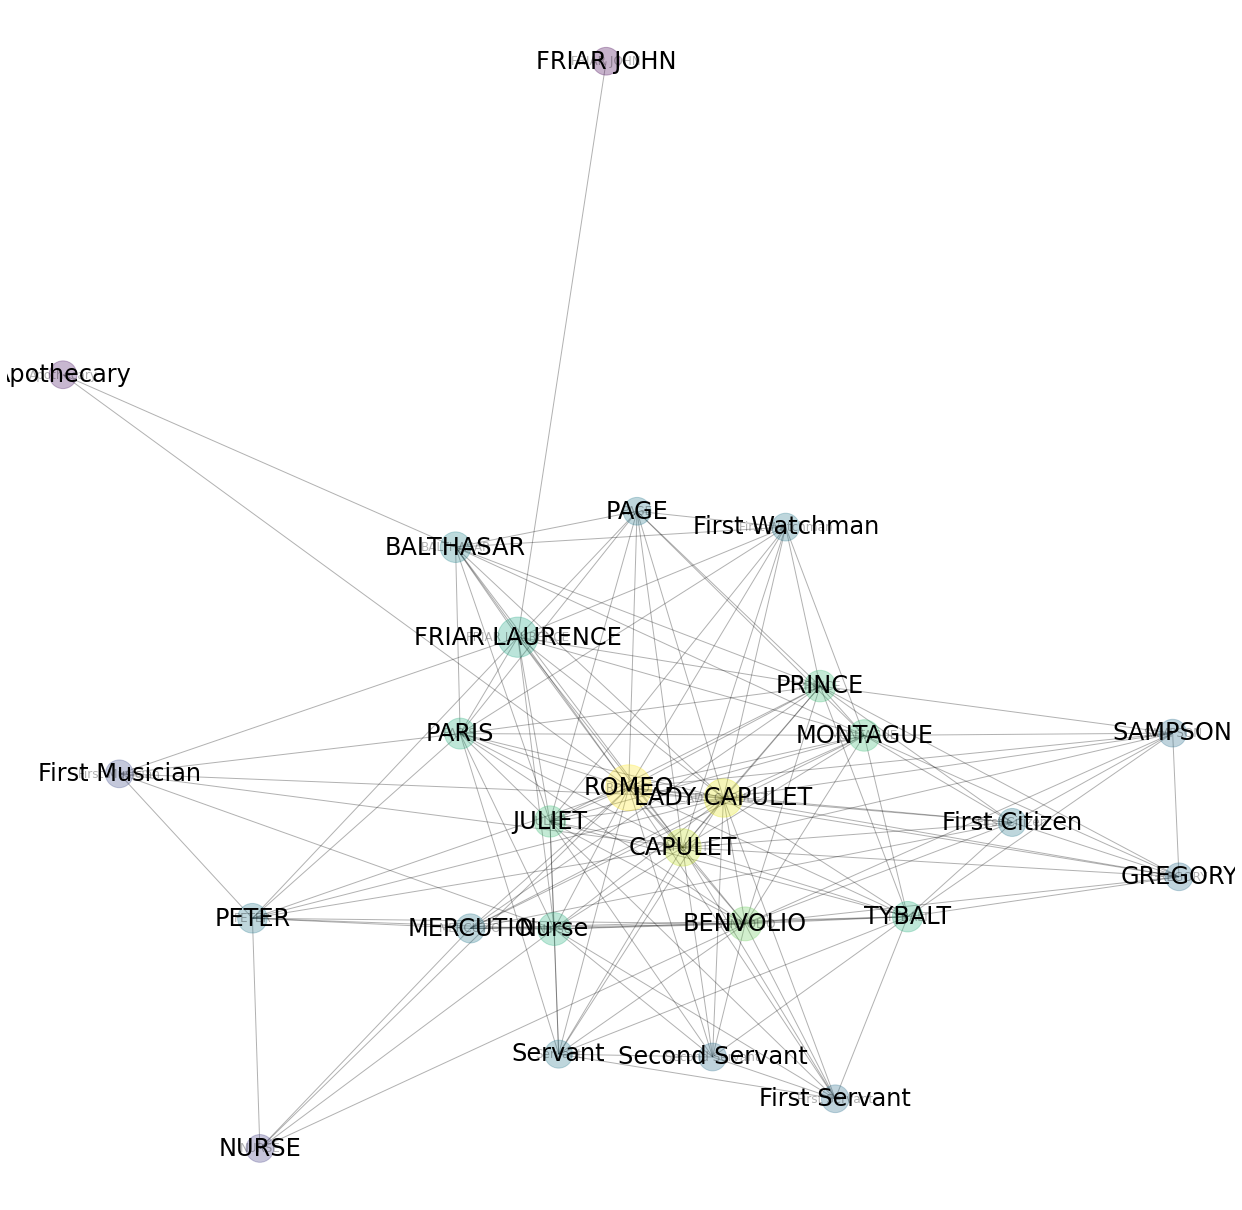

In [93]:
pos = nx.spring_layout(wChars)
betCent = nx.betweenness_centrality(wChars, normalized=True, endpoints=True)
node_color = [40000.0 * wChars.degree(v) for v in wChars]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(22,22))
nx.draw_networkx(wChars, pos=pos, with_labels=True,
                 node_color=node_color,alpha=0.3,
                 node_size=node_size,seed=50)
nx.draw_networkx_labels(wChars, pos, font_size=24, font_family='sans-serif')
plt.axis('off');

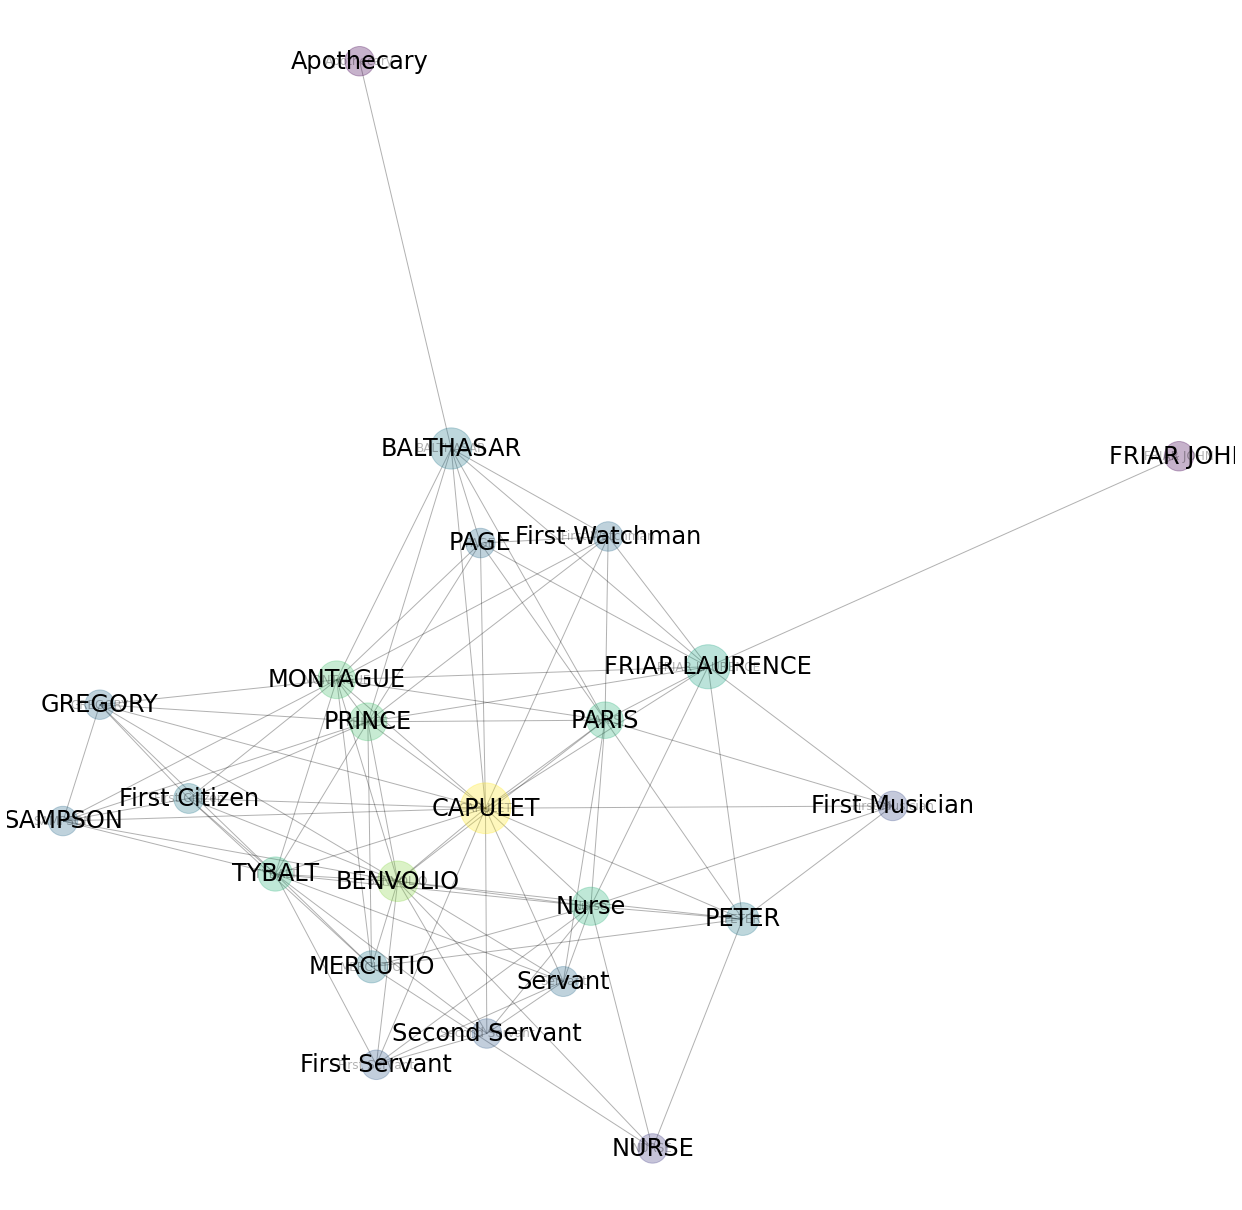

In [94]:
pos = nx.spring_layout(woChars)
betCent = nx.betweenness_centrality(woChars, normalized=True, endpoints=True)
node_color = [40000.0 * woChars.degree(v) for v in woChars]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(22,22))
nx.draw_networkx(woChars, pos=pos, with_labels=True,
                 node_color=node_color,alpha=0.3,
                 node_size=node_size,seed=50)
nx.draw_networkx_labels(woChars, pos, font_size=24, font_family='sans-serif')
plt.axis('off');